# 作業1：

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

1. 你選的這組資料為何重要

2. 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

3. 蒐集而來的資料型態為何

4. 這組資料想解決的問題如何評估

Predict Future Sales
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data

## 作業1 回答

1.資料有時間連續性，易於評估理解商店、商品、商品分類與銷量間的關係

2.資料提供者是 one of the largest Russian software firms - 1C Company. 來自於他們的店面銷售數據

3.資料型態主要是結構化資料，以數值和類別名稱為主。

4.評估的方式會用回歸方式來量測，以衡量測試資料的預測值與實際值的差異來評估。

## Predict Future Sales - Data fields

#### 。ID - an Id that represents a (Shop, Item) tuple within the test set
#### 。shop_id - unique identifier of a shop
#### 。item_id - unique identifier of a product
#### 。item_category_id - unique identifier of item category
#### 。item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
#### 。item_price - current price of an item
#### 。date - date in format dd/mm/yyyy
#### 。date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
#### 。item_name - name of item
#### 。shop_name - name of shop
#### 。item_category_name - name of item category

In [3]:
# Executed in a local jupyter notebook
!pip install kaggle

In [8]:
#載入競賽資料API
!kaggle competitions download -c competitive-data-science-predict-future-sales

  0%|                                               | 0.00/3.49k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 3.49k/3.49k [00:00<00:00, 5.29MB/s]
  0%|                                               | 0.00/1.50M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.50M/1.50M [00:00<00:00, 77.0MB/s]
  0%|                                               | 0.00/2.91k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 2.91k/2.91k [00:00<00:00, 4.20MB/s]
  0%|                                                | 0.00/469k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 469k/469k [00:00<00:00, 54.0MB/s]
  0%|                                               | 0.00/1.01M [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.01M/1.01M [00:00<00:00, 49.8MB/s]
 39%|██████████████▋                       | 5.00M/12.9M [00:00<00:00, 18.3MB/s]
100%|██████████████████████████████████████| 12.9M/12.9M [00:00<00:00, 37.6MB/s]


In [1]:
# Basic packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots


# TIME SERIES
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


# settings
import warnings
warnings.filterwarnings("ignore")

In [120]:
# Import all of them 
sales=pd.read_csv("./data/Day_001_Q1_data/sales_train.csv")

# settings
import warnings
warnings.filterwarnings("ignore")

item_cat=pd.read_csv("./data/Day_001_Q1_data/item_categories.csv")
item=pd.read_csv("./data/Day_001_Q1_data/items.csv")
sub=pd.read_csv("./data/Day_001_Q1_data/sample_submission.csv")
shops=pd.read_csv("./data/Day_001_Q1_data/shops.csv")
test=pd.read_csv("./data/Day_001_Q1_data/test.csv")

In [121]:
#日期 / 連續區間月份 / 商店ID / 商品ID / 商品售價 / 銷量 
sales.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [122]:
#商品分類名稱 / 商品分類ID
item_cat.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [123]:
#商品名稱 / 商品ID / 商品分類ID
item.head(5)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [124]:
sub.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [125]:
#商店名稱 / 商店ID
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


# 作業2：

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

1. 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

2. 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

3. 蒐集而來的資料型態為何

4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)

## 作業2 回答

1.目標是「提昇業績」，而業績與載客量是正相關。
我們可以假設幾種不同的狀況來評估提昇載客量
（1）依生活型態：熱門周邊景點分布狀況
（2）依交通轉乘：車站、客運站、捷運站等轉乘點分布情況
（3）依經濟條件：人口經濟收入狀況、職業等

2.資料可以參考政府開放資料庫獲取相關公開數據

3.資料型態多為結構化資料（數值、類別）

4.評量預測值與載客成功的正確率


# 作業3：

請點選下方檢視範例依照 Day_001_example_of_metrics.ipynb 完成 Mean Squared Error 的函式

資料夾結構建立規則提醒：2nd-ML100Days > data資料夾 & homework資料夾 (ipynb檔) 

(請注意data的存放位置，建議放在*.ipynb 同一個目錄下，這樣才能在不修改code的情況下正常執行)

# 統計指標實作範例
## 常見於迴歸問題的評估指標
* Mean Absolute Error (MAE)
* Mean Squared Error (MSE)

## 常見於分類問題的指標
* Binary Cross Entropy (CE)

##### 後面的課程還會有更詳細的說明

## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def mean_squared_error(y, y_hat):
    """
    請完成這個 Function 後往下執行
    """
    total = 0
    for i in range(len(y)):
        total += np.square(y[i] - y_hat[i])
    return total/len(y)

def mean_absolute_error(y, y_hat):
    """
    請完成這個 Function 後往下執行
    """
    total = 0
    for i in range(len(y)):
        total += abs(y[i] - y_hat[i])
    return total/len(y)

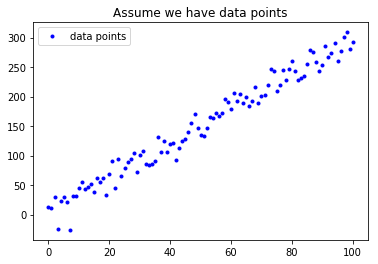

In [44]:
w = 3
b = 0.5

x_lin = np.linspace(0, 100, 101)

y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

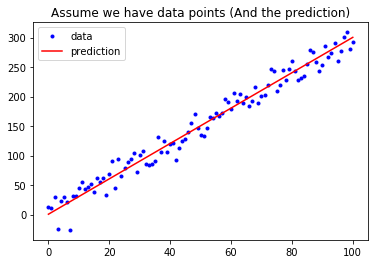

In [45]:
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [46]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 231.142
The Mean absolute error is 12.682
